In [208]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [209]:
df = pd.read_csv("datos_proyecto_athena.csv", sep=',')
df.head()

,cole_cod_dane_sede,periodo,cole_naturaleza,cole_bilingue,cole_calendario,cole_jornada,fami_tieneautomovil,fami_estratovivienda,fami_tieneinternet,fami_tienecomputador,estu_edad,punt_c_naturales,punt_lectura_critica,punt_sociales_ciudadanas,punt_matematicas,desemp_ingles,punt_global
0,311001093652,20224,NO OFICIAL,N,A,COMPLETA,Si,Estrato 5,Si,Si,17,68,76,78,82.0,B+,382
1,111001098612,20224,OFICIAL,N,A,UNICA,No,Estrato 2,Si,Si,18,55,61,42,58.0,A2,272
2,111001010740,20224,OFICIAL,N,A,TARDE,No,Estrato 2,Si,Si,20,47,48,41,57.0,A-,240
3,111769003416,20224,OFICIAL,N,A,MAÑANA,No,Estrato 2,Si,No,18,35,54,47,53.0,A-,230
4,111001076376,20224,OFICIAL,N,A,TARDE,No,Estrato 2,Si,Si,17,38,51,39,48.0,A-,220


# Análisis exploratorio

## Edad del estudiante

C:\Users\jeison.orjuela\AppData\Local\Temp\ipykernel_19992\2885252734.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=df, y="estu_edad", binwidth=1, palette="light:m_r", edgecolor=".3")


[Text(0, 0, '859'),
 Text(0, 0, '31237'),
 Text(0, 0, '53646'),
 Text(0, 0, '24426'),
 Text(0, 0, '43622'),
 Text(0, 0, '59970'),
 Text(0, 0, '46239'),
 Text(0, 0, '44584'),
 Text(0, 0, '18100'),
 Text(0, 0, '6147'),
 Text(0, 0, '1671'),
 Text(0, 0, '766'),
 Text(0, 0, '565'),
 Text(0, 0, '439'),
 Text(0, 0, '374'),
 Text(0, 0, '348'),
 Text(0, 0, '294'),
 Text(0, 0, '225'),
 Text(0, 0, '237'),
 Text(0, 0, '203'),
 Text(0, 0, '199'),
 Text(0, 0, '207'),
 Text(0, 0, '213'),
 Text(0, 0, '377')]

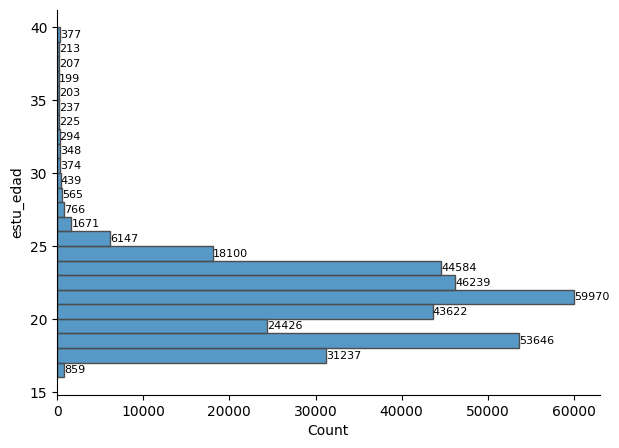

In [210]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Análisis de edad
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

ax = sns.histplot(data=df, y="estu_edad", binwidth=1, palette="light:m_r", edgecolor=".3")
ax.bar_label(ax.containers[1], fontsize=8)

C:\Users\jeison.orjuela\AppData\Local\Temp\ipykernel_19992\2016759654.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="estu_edad", y='punt_global', binwidth=(1,30), legend=True, palette="light:m_r", cbar=True, cbar_kws=dict(shrink=.75),)


<Axes: xlabel='estu_edad', ylabel='punt_global'>

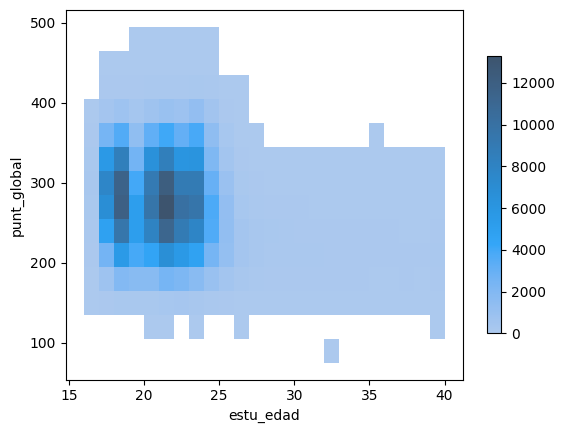

In [211]:
sns.histplot(data=df, x="estu_edad", y='punt_global', binwidth=(1,30), legend=True, palette="light:m_r", cbar=True, cbar_kws=dict(shrink=.75),)

In [212]:
# Según las gráficas anteriores agrupar edades > 25 y < 18
def conditions(s):
    if (s['estu_edad'] > 25):
        return '> 25'
    elif(s['estu_edad'] < 18):
        return '< 18'
    else:
        return s['estu_edad']

df['estu_edad_cat'] = df.apply(conditions, axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334948 entries, 0 to 334947
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   cole_cod_dane_sede        334948 non-null  int64  
 1   periodo                   334948 non-null  int64  
 2   cole_naturaleza           334948 non-null  object 
 3   cole_bilingue             334948 non-null  object 
 4   cole_calendario           334948 non-null  object 
 5   cole_jornada              334948 non-null  object 
 6   fami_tieneautomovil       334948 non-null  object 
 7   fami_estratovivienda      334948 non-null  object 
 8   fami_tieneinternet        334948 non-null  object 
 9   fami_tienecomputador      334948 non-null  object 
 10  estu_edad                 334948 non-null  int64  
 11  punt_c_naturales          334948 non-null  int64  
 12  punt_lectura_critica      334948 non-null  int64  
 13  punt_sociales_ciudadanas  334948 non-null  i

## Estrato

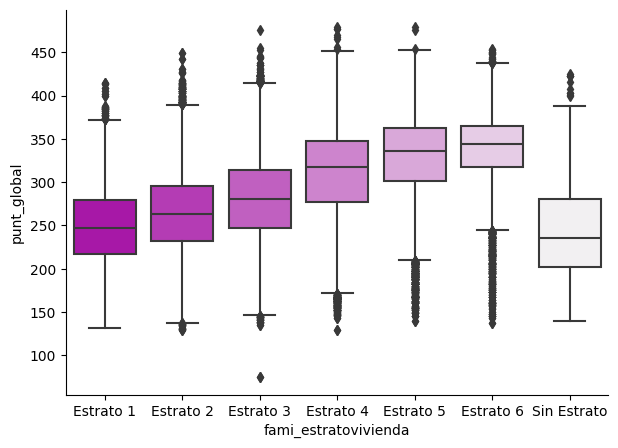

In [213]:
# Análisis de estrato
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

ax = sns.boxplot(data=df, x="fami_estratovivienda", y='punt_global', palette="light:m_r",
    order=['Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6', 'Sin Estrato'])


In [207]:
# Según el boxplot anterior agrupar estratos 1 con 2 y estratos 5 con 6 ---- POR REVISAR
def conditions(s):
    if (s['fami_estratovivienda'][s['fami_estratovivienda'].isin(['Estrato 1', 'Estrato 2'])]):
        return 'Estrato 1 y 2'
    elif(s['fami_estratovivienda'][s['fami_estratovivienda'].isin(['Estrato 5', 'Estrato 6'])]):
        return 'Estrato 5 y 6'
    else:
        return s['fami_estratovivienda']

df['fami_estratovivienda'] = df.apply(conditions, axis=1)

AttributeError: 'str' object has no attribute 'isin'

<Axes: xlabel='fami_estratovivienda', ylabel='count'>

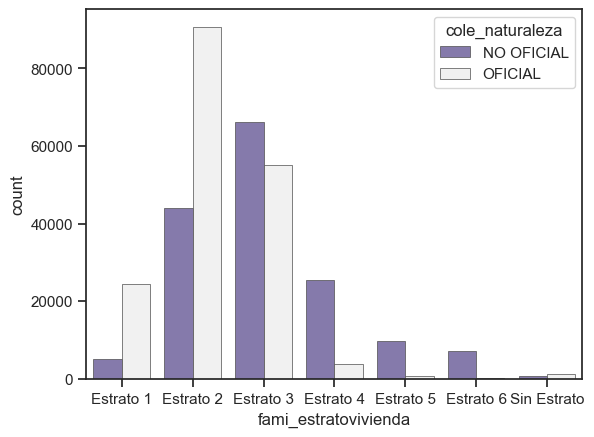

In [305]:
# Estrato vivienda
sns.countplot(df, x='fami_estratovivienda', hue='cole_naturaleza', palette="light:m_r", edgecolor=".3", linewidth=.5, 
              order=['Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6', 'Sin Estrato'])

C:\Users\jeison.orjuela\AppData\Local\Temp\ipykernel_19992\2306409725.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, y="fami_estratovivienda", x='punt_global', binwidth=(30,1), legend=True, palette="light:m_r", cbar=True, cbar_kws=dict(shrink=.75),)


<Axes: xlabel='punt_global', ylabel='fami_estratovivienda'>

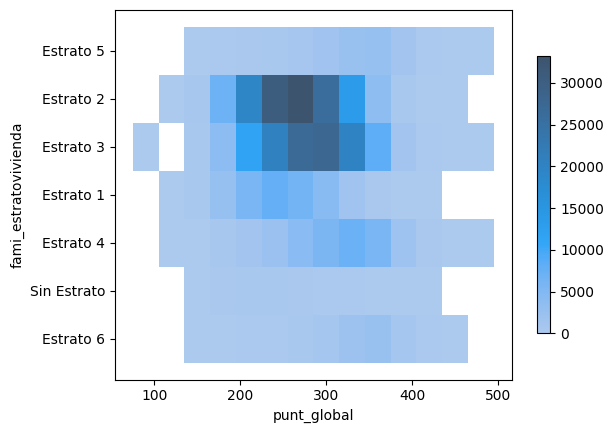

In [191]:
sns.histplot(data=df, y="fami_estratovivienda", x='punt_global', binwidth=(30,1), legend=True, palette="light:m_r", cbar=True, cbar_kws=dict(shrink=.75),)

[Text(0.5, 1.0, 'Count plot naturaleza del colegio')]

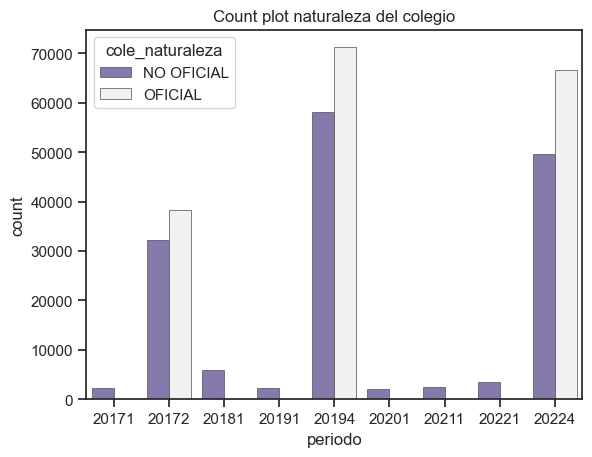

In [306]:
# Distribución naturaleza del colegio
sns.countplot(df, x='periodo', hue='cole_naturaleza', palette="light:m_r", edgecolor=".3", linewidth=.5,).set(title= 'Count plot naturaleza del colegio')

C:\Users\jeison.orjuela\AppData\Local\Temp\ipykernel_19176\768203134.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="fami_tieneautomovil", y='punt_global', binwidth=(1,30), legend=True, palette="light:m_r", cbar=True, cbar_kws=dict(shrink=.75),)


<Axes: xlabel='fami_tieneautomovil', ylabel='punt_global'>

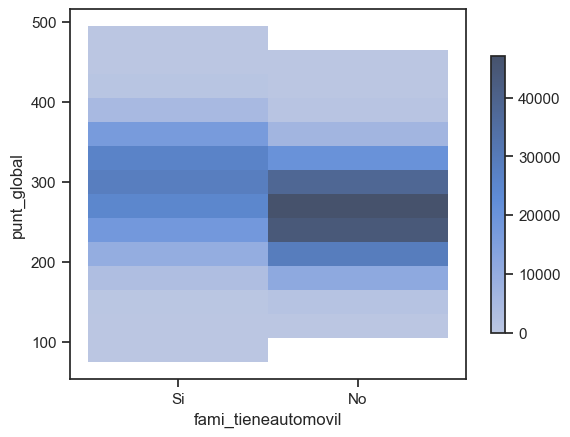

In [310]:
sns.histplot(data=df, x="fami_tieneautomovil", y='punt_global', binwidth=(1,30), legend=True, palette="light:m_r", cbar=True, cbar_kws=dict(shrink=.75),)

In [187]:
# Calcular el total de estudiantes - Para luego calcular porcentajes
total_students = df.groupby(['cole_cod_dane_sede','cole_naturaleza', 'cole_bilingue', 'cole_calendario', 'cole_jornada'],as_index=False).agg(total_students=('fami_tieneautomovil','count'))

# Agregar informacion y filtrar con k - 1 clases
# fami_tieneautomovil
result = df.groupby(['cole_cod_dane_sede','cole_naturaleza', 'cole_bilingue', 'cole_calendario', 'cole_jornada', 'fami_tieneautomovil', 'fami_estratovivienda', \
    'fami_tieneinternet', 'fami_tienecomputador', 'estu_edad_cat', 'desemp_ingles'], 
    as_index=False).agg(total_rows=('fami_tieneautomovil', 'count')
    )
# agg_automovil = agg_automovil[agg_automovil['fami_tieneautomovil'] == 'Si']


# Hacer left join
result = pd.merge(result, total_students, on = ['cole_cod_dane_sede','cole_naturaleza', 'cole_bilingue', 'cole_calendario', 'cole_jornada'])
result.head(140)
# result['perc_fami_tieneauto']=result['count_fami_automovil']/result['total_students']

# # fami_tieneinternet
# agg_internet = df.groupby(['cole_cod_dane_sede','periodo','cole_naturaleza', 'cole_bilingue', 'cole_calendario', 'cole_jornada', 'fami_tieneinternet'],as_index=False) \
#     .agg(count_fami_internet=('fami_tieneinternet', 'count'))
# # Hacer left join
# result = pd.merge(result, agg_internet, on = ['cole_cod_dane_sede','periodo','cole_naturaleza', 'cole_bilingue', 'cole_calendario', 'cole_jornada'])
# result = result[result['fami_tieneinternet'] == 'Si']
# result['perc_fami_tieneinternet']=result['count_fami_internet']/result['total_students']

# # Comprobar resultado
# print(result.size)
# print('------------------')
# result.head(20)

,cole_cod_dane_sede,cole_naturaleza,cole_bilingue,cole_calendario,cole_jornada,fami_tieneautomovil,fami_estratovivienda,fami_tieneinternet,fami_tienecomputador,estu_edad_cat,desemp_ingles,total_rows,total_students
0,111001000078,OFICIAL,N,A,UNICA,No,Estrato 1,No,No,23,A-,1,457
1,111001000078,OFICIAL,N,A,UNICA,No,Estrato 1,No,No,23,A1,2,457
2,111001000078,OFICIAL,N,A,UNICA,No,Estrato 1,No,No,24,A-,2,457
3,111001000078,OFICIAL,N,A,UNICA,No,Estrato 1,Si,No,18,A-,2,457
4,111001000078,OFICIAL,N,A,UNICA,No,Estrato 1,Si,Si,19,A-,2,457
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,111001000078,OFICIAL,N,A,UNICA,Si,Estrato 4,Si,Si,20,A1,2,457
136,111001000078,OFICIAL,N,A,UNICA,Si,Estrato 4,Si,Si,21,A1,2,457
137,111001000124,OFICIAL,N,A,MAÑANA,No,Estrato 1,No,No,18,A1,2,343
138,111001000124,OFICIAL,N,A,MAÑANA,No,Estrato 1,No,No,24,A1,2,343


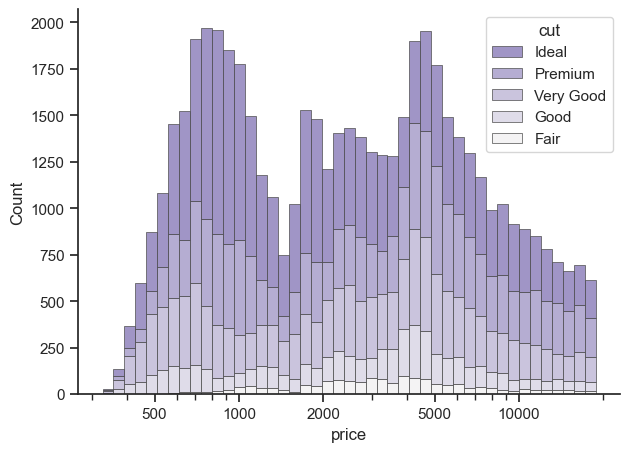

In [10]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

<Axes: xlabel='alcohol', ylabel='abbrev'>

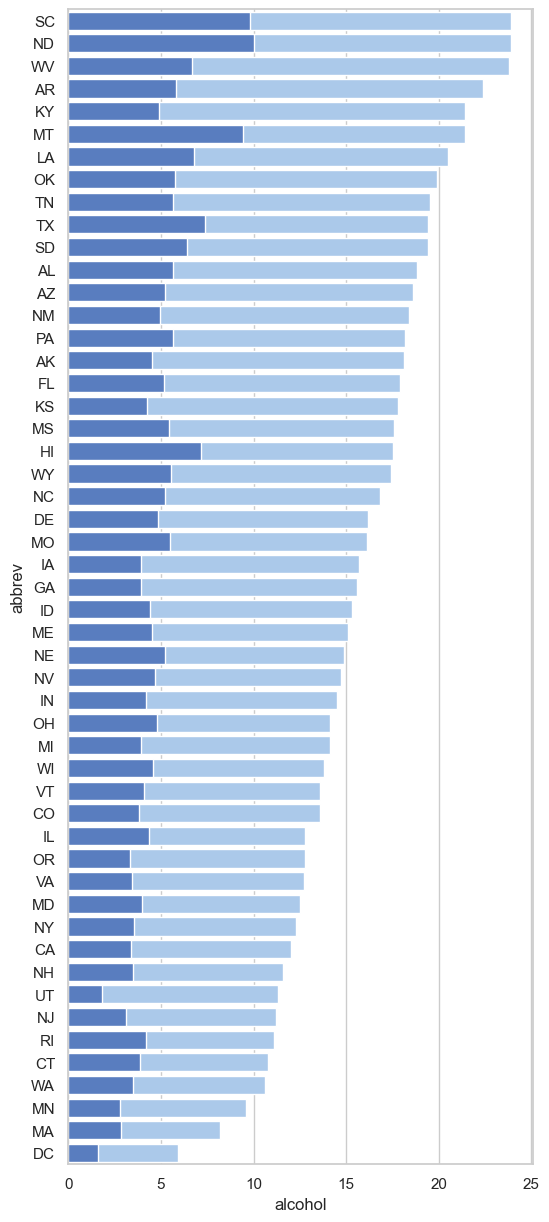

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)